# ``Taming Performance Variability''

### <font color='gray'> Analysis of E vs CoV</font>

In [1]:
import os, sys
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md
from matplotlib import gridspec
import matplotlib.patches as patches
import datetime as dt
from collections import OrderedDict 
from collections import deque
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression.quantile_regression import QuantReg
import warnings
from scipy.stats import norm
from IPython.display import IFrame
from IPython.display import Markdown, display
from IPython.display import FileLink, FileLinks
import calendar

# Improve plot quality for retina displays
%config InlineBackend.figure_format = 'retina'

# Read all inputs from this directory
source_dir = "../data/CoV-Summary/"
# Save all dataframes and plots into this directory 
dest_dir = "output/CoV-Summary/"

if not os.path.isdir(dest_dir):
    os.mkdir(dest_dir)
    
# Allows setting values in dataframe copies without warnings (default='warn')
pd.options.mode.chained_assignment = None 

# If vebose is set, additional debug info will be printed. Use this flag throughout the notebook
verbose = True

# Include common helper functions. You can see the avilable files and their code 
# if you use JupyterHub's file browser to navigate to the specifed directory 
sys.path.append("bench-lib/")
from common import *

/opt/conda/envs/py27/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# db -- dictinary with keys - table names, values - dataframes with table data
df = pd.DataFrame()

for f in os.listdir(source_dir):
    if ".csv" in f:
        df = pd.read_csv(source_dir + f)
    
# Allows setting values in dataframe copies without warnings (default='warn')
pd.options.mode.chained_assignment = None 

# If vebose is set, additional debug info will be printed throughout the notebook
verbose = True
if verbose:
    print "Sample from dataframe:" 
    print df.head(3)

Sample from dataframe:
   ROW ID     Type                                   Config  Site    HW  \
0      10  Network  [utah, m400, False, bandwidth, reverse]  utah  m400   
1      17  Network     [utah, m510, True, latency, forward]  utah  m510   
2      14  Network    [utah, m510, False, latency, forward]  utah  m510   

   SampleCount          Mean            SD        RSD  RSD_Outliers_Removed  \
0         1193  6.010000e+09  6.140000e+08  10.222998              9.042823   
1          189  1.610000e-02  1.450000e-03   9.010256              8.941004   
2          802  2.350000e-02  1.900000e-03   8.086142              8.109640   

   RSD_Change  idx  E(X)  
0   -1.180175   52    12  
1   -0.069252   51   188  
2    0.023497   48   230  


Text(0,0,u'')


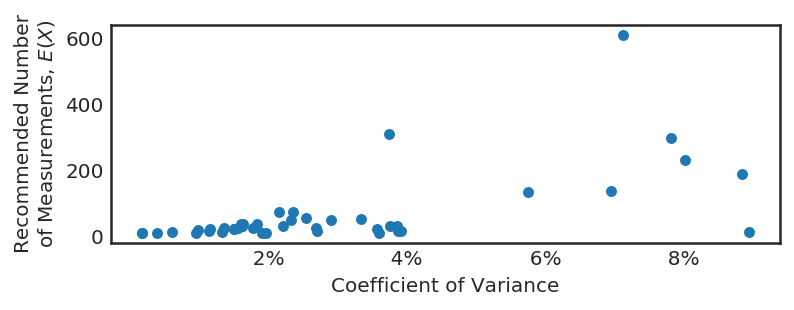

/notebooks/output/CoV-Summary/e-vs-cov-paper.pdf

In [35]:
sns.set_style("white")

f, axarr = plt.subplots(1, 1, sharex=False, sharey=False, figsize=(6, 2))
df.plot("RSD_Outliers_Removed", "E(X)", ax=axarr, kind="scatter", marker='o')
#axarr.set_xticklabels("")
axarr.set_xlabel("Coefficient of Variance") # , fontsize=14)
axarr.set_ylabel("Recommended Number\nof Measurements, ${E}(X)$") #, fontsize=14)
#axarr.set_title("Node: c220g2-011323, iodepth: 4096, device: SSD (full device), test: 4k seq writes")
#axarr.legend().set_visible(False)
print axarr.get_xticklabels()[1]

#xlabels = axarr.get_xticklabels() 
#axarr.set_xticklabels(xlabels, rotation=45, ha="right")

vals = axarr.get_xticks()
axarr.set_xticklabels(['{:3.0f}%'.format(x) if x > 0.1 else "" for x in vals])

plot_show_and_save(f, "e-vs-cov-paper.pdf", dest_dir)